# Preamble

In [16]:
import os
from importlib import reload
os.chdir('/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WLD')

%matplotlib inline 

import mycode
reload(mycode);

In [17]:
from mycode import money
from mycode import preamble
from mycode import weights 
from mycode import maps 

from tqdm import tqdm 

%run mycode/preamble.py

reload(weights)
reload(preamble)
reload(maps)
reload(money);

In [18]:
from matplotlib import pyplot as plt
import numpy as np

# Checks

In [3]:
median_prep = pickle.load(open("data/fmedian_prep.p", 'rb'), encoding='latin1')
weights_prep = pickle.load(open("data/fweights_prep.p", 'rb'), encoding='latin1')

median2_prep = pickle.load(open("data/fmedian_prep2.p", 'rb'), encoding='latin1')
weights2_prep = pickle.load(open("data/fweights_prep2.p", 'rb'), encoding='latin1')

In [4]:
g1s = np.array([-0.02, -0.015, -0.01, -0.005, 0, 0.005, 0.01, 0.015, 0.02])

In [5]:
betas, (values, values_grp), (cov, cov_grp, corr, corr_grp), (errs, errs_grp), (boot_values, boot_values_grp) = median_prep


In [6]:
#(1) Do you expect the number of entries in each histogram (say, for blending off) to be the same? 
print([len(values) for values in boot_values])

#A: yes

[10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


10000.0
10000.0


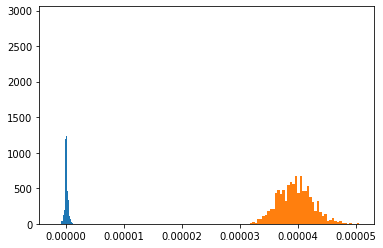

In [15]:
#(2) Do you know whether the number of entries in each histogram is actually the same?  
#Can you check by counting the entries?
A,v,x = plt.hist(boot_values[4], bins=50)
print(np.sum(A))

A,v,x = plt.hist(boot_values[-1], bins=50)
print(np.sum(A))

# yes. 

# Attempt at correct plotting

Based on: https://stackoverflow.com/questions/47999159/normalizing-two-histograms-in-the-same-plot

In [21]:
min(boot_values[4])
max(boot_values[4])

print(min(boot_values[5]))
print(max(boot_values[5]))

1.6288157e-06
1.0382978e-05


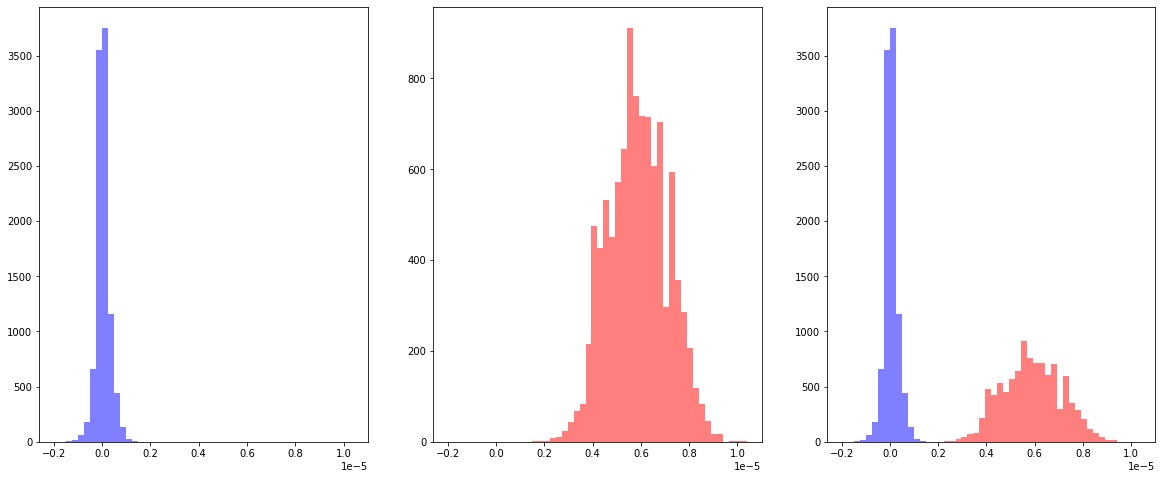

In [41]:
x1 = min(min(boot_values[4]), min(boot_values[5]))
x2 = max(max(boot_values[4]), max(boot_values[5]))


##computing the bin properties (same for both distributions)
num_bin = 50
bin_lims = np.linspace(x1,x2,num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(boot_values[4], bins=bin_lims)
hist2, _ = np.histogram(boot_values[5], bins=bin_lims)


fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols =3, figsize=(20,8))

ax1.bar(bin_centers, hist1, width = bin_widths, align = 'center', color='blue', alpha=0.5)
ax2.bar(bin_centers, hist2, width = bin_widths, align = 'center', color='red', alpha = 0.5)

ax3.bar(bin_centers, hist1, width = bin_widths, align = 'center', color='blue', alpha=0.5)
ax3.bar(bin_centers, hist2, width = bin_widths, align = 'center', color='red', alpha = 0.5)

ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax3.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# Final attempt for all

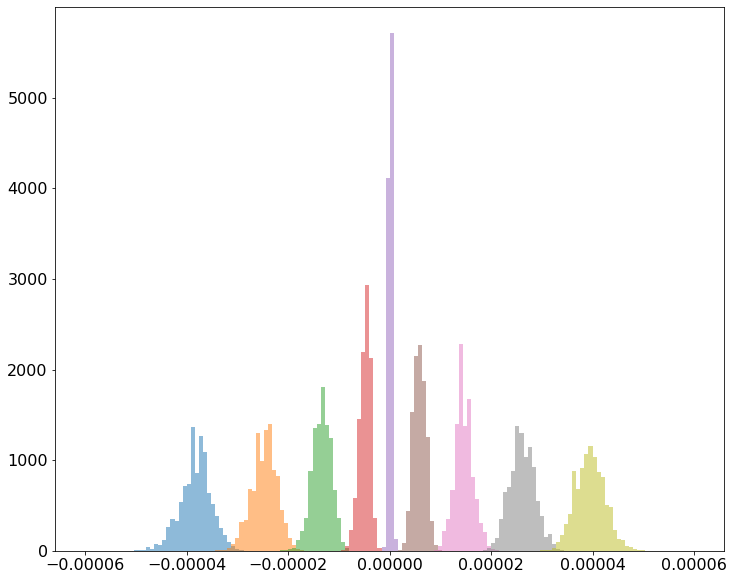

In [59]:
x1 = min([min(values) for values in boot_values])
x2 = max([max(values) for values in boot_values])


##computing the bin properties (same for both distributions)
num_bin = 25*6
bin_lims = np.linspace(-6e-5,6e-5,num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hists = [np.histogram(values, bins=bin_lims)[0] for values in boot_values]
# hist1, _ = np.histogram(boot_values[4], bins=bin_lims)
# hist2, _ = np.histogram(boot_values[5], bins=bin_lims)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
for hist in hists: 
    ax.bar(bin_centers, hist, width=bin_widths, align = 'center', alpha=0.5)

ax.tick_params(axis='both', which='major', labelsize=16)


In [62]:
max(hists[0])

1368

# Original plot

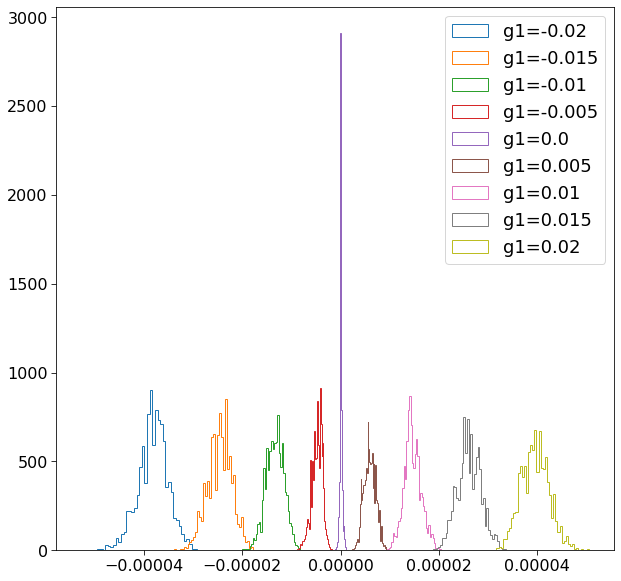

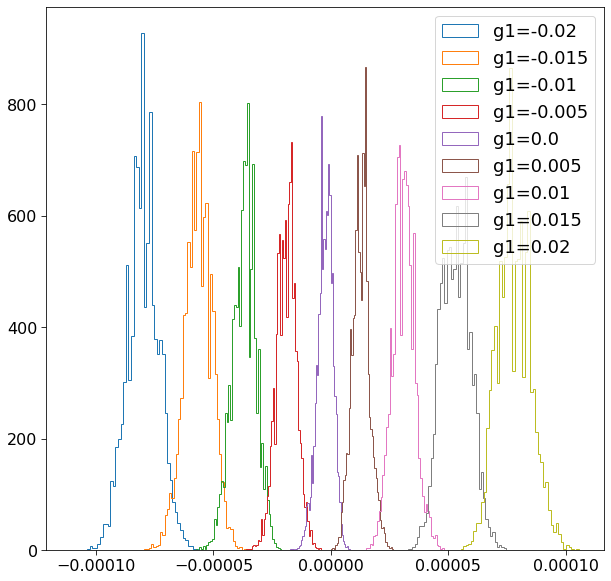

In [7]:
#bootstrapped medians 
plt.figure(figsize=(10,10))
for g1, values in zip(g1s, boot_values): 
    plt.hist(values, label=f"g1={g1}", histtype='step', bins=50, density=False)
    plt.legend(prop={"size":18})
    plt.tick_params(axis='both', which='major', labelsize=16, length=5)

